# Iron Chef Battle Royale - The Tournament of the Century!



Well, well, well. The end is nigh. The best chefs from around the world have been summoned for one last extravagant test of wits and strength: a cooking battle royale!

You will all enter the arena and battle each other. Your team consists of ``n`` chefs, all of which will be randomly distributed in the arena.

* Your task is to create one python class, named after your team's name, with the attributes and methods shown in the code snippets below. You will submit your class script to us and we will run the final battle with all classes put together.
* Your chefs will all be instances of your class. All chefs must belong to the same class.
* Chefs in the arena will take turns one at a time. Order will be randomly determined.
* When it is a chef's turn, they can decide wether to move to a neighboring space or not. If the space is occupied by another chef, a battle ensues.
* A 1-1 battle consists of picking one of three secret ingredients: Ras el hanout (R), Peppermint chocolate (P), and Spicy habanero (S).
* The outcome of each competition will be determined by a set of capricious and idiosyncratic judges, whose combined preferences have produced the following circular logic:
  * R beats S, S beats P, and P beats R.
  * If two chefs pick the same ingredient, they tie.
  * If the attacking chef wins, they move to the defender's cell, and the defender is out of the competition (their team loses a member). If the defender wins, the attacker is out of the competition. The defender stays in their spot.
* Chefs can choose their apron color and hat shape among the allowed colors and shapes (see details under ``appearance()``below).
* The only information regarding neighboring chefs are their apron color and hat shape. Use this information to strategize your ingredient selection!
* You can choose your movement rules. More information on movement below.
* This battle royale is rudeless: if your chefs don't return the expected outputs, they will be disqualified!!
* If your class makes use of a python package, let us know with enough time. To avoid complications, we recommend you use common python packages.




## Movement details

The arena is just an NxN grid. The "neighbors" of your chef will be the eight cells surrounding it: left, righ, up, down, and diagonals. Like this:

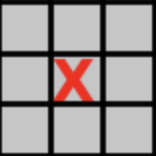

You can think of the positions as indexed from 0 to 8. Like this:

| 0 | 1 | 2 |

| 3 | 4 | 5 |

| 6 | 7 | 8 |

Your chef will consider itself to be in "4", and when it decides where to move, it must output one of the numbers in [0,8] (4 if they don't want to move).


## Note about classes

You must have at least the methods and attributes provided in the example teams:

* ``chef_ID``
  * this attribute is determined at initialization and given by the tournament organizers. It will be how the tournament organizers keep track of each chef.
* ``move()``
  * Must return an integer in [0,8].
  * Takes as arguments the current coordinates in the grid (matrix indexing), and a list of neighbor appearances, where the first entry is the appearance of neighbor "0", the second is neighbor "1", and so on, following the logic of the neighborhood grid.
* ``appearance()``
  * Must return a list with two strings, the first one corresponds to the hat shape, the second one to the apron color. For hat shape use a standard 1-character string, for example ``'>'`` or ``'T'``. For apron color you can use matplotlib [named colors](https://matplotlib.org/stable/gallery/color/named_colors.html).
* ``cook()``
  * Returns the ingredient you select for that battle.
  * Takes as arguments the opponent's hat shape and apron color
* ``record_outcome()``
  * Optional, you can record the outcome of the battle if you want to learn your opponent's strategies.
  * Takes as arguments the opponent's hat shape and apron color, the ingredients you and your opponent chose, and an indicator of who won (-1 for loss, 0 for tie, 1 for win).






## The Arena
Finally, the arena will be an NxN grid. It looks like the following image (it has been populated by default chef teams):

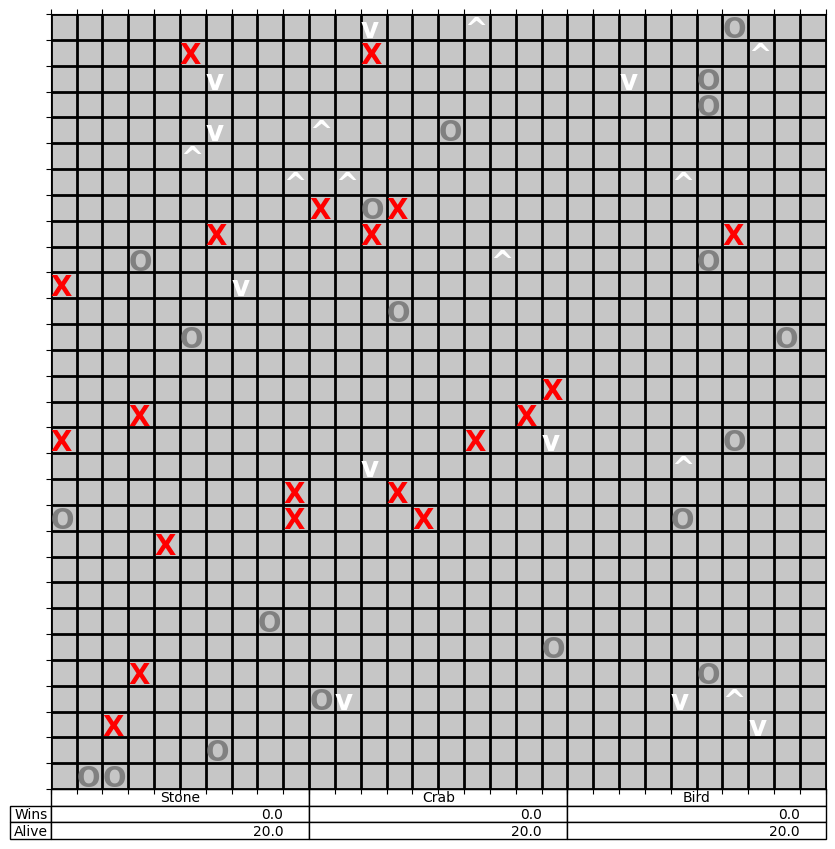

## Imports

In [ ]:
# Remember to import the packages that we need
import numpy as np
import random
import matplotlib.pyplot as plt
import IPython.display as display

# Definitions

## Chef Classes

The class GenericChef is a generic template for your class. GenericChefDocumented is the same but with detailed descriptions in case you need it (we recommend you skip it to save time). It may be faster to learn by example, so we provided some default teams: the classes Stone, Crab, and Bird, are fully functional classes of simple chefs. The class Harvester is a functional chef class with slightly more complexity.

### Template Teams

In [ ]:
class GenericChef:
  allowed_ingredients = ["R", "P", "S"]

  def __init__(self, chef_ID):
    self.chef_ID = chef_ID

  def move(self, myPos = 4, neighbors = []):
    random_opponent = np.random.choice(9)
    return random_opponent;

  def appearance(self):
    simple_appearance = ["G", "white"]
    return simple_appearance;

  def cook(self, opp_shape, opp_color):
    random_ingredient = np.random.choice(allowed_ingredients)
    return random_ingredient;

  def record_outcome(self, opp_shape, opp_color, you_chose, opp_chose, win_loss_tie):
    return ;

  def __repr__(self):
    return f"{type(self).__name__}(ID = {self.chef_ID})"

In [ ]:
class GenericChefDocumented:
  """
  A template for a generic chef class.

  ...

  Attributes
  ----------
  chef_ID : str
      the chef_ID of a particular instance, it will be determined by tournament organizers.
  allowed_ingredients : list
      list of allowed secret ingredients

  Methods
  -------
  move(myPos = 4, neighbors = [])
      Determines the new cell to which the chef will move, relative to its current position.
  """
  allowed_ingredients = ["R", "P", "S"]

  def __init__(self, chef_ID):
    """
    Parameters
    ----------
    chef_ID: str
        the chef_ID of the chef as recorded by the tournament organizers.
    """
    self.chef_ID = chef_ID


  def move(self, myPos = 4, neighbors = []):
    """
    Given a list of neighbor appearances, determines the new cell to which
    the chef will move, relative to its current position. The indices follow the
    following grid:
    | 0 | 1 | 2 |
    | 3 | 4 | 5 |
    | 6 | 7 | 8 |

    Parameters
    ----------
    myPos : int
        This chef's current [i,j] position in the arena (matrix indexing).
    neighbors : list
        A list of neighbor appearances, which are [shape,color] pairs of strings. The "appearance" of an empty cell will be an empty list.
    """
    random_opponent = np.random.choice(9) # This chef chooses opponents randomly among its neighbors. Choosing itself means don't do anything.
    return random_opponent;

  def appearance(self):
    """
    Returns a [shape,color] list of strings, representing the chef's appearance. Shape and color must be take allowed values.
    """
    simple_appearance = ["O", "white"] # This chef wears a white apron and a circular hat.
    return simple_appearance;

  def cook(self, opp_shape, opp_color):
    """
    Returns a secret ingredient to combat the other chef. Must be in the allowed list.
    """
    random_ingredient = np.random.choice(allowed_ingredients) # This chef chooses ingredients randomly.
    return random_ingredient;

  def record_outcome(self, opp_shape, opp_color, you_chose, opp_chose, win_loss_tie):
    """
    Records outcome of 1-1 cook-off for internal purposes. The chef can use this information for future strategy.

    Parameters
    ----------
    opp_shape : str
        The hat shape of the opponent chef
    opp_color : str
        The apron color of the opponent chef
    you_chose : str
        The secret ingredient you chose
    opp_chose : str
        The secret ingredient opponent chef chose
    win_loss_tie : int
        The outcome of the match: -1 if loss, 0 if tie, 1 if win
    """
    # This chef doesn't do anythng with outcome information
    return ;

  def __repr__(self):
    """
    Do no modify this function.
    """
    return f"{type(self).__name__}(ID = {self.chef_ID})"

### Functional Default Teams

In [ ]:
#Stones don't move, look like gray O's, and always pick Ras el hanout (R)
class Stone:
  def __init__(self, chef_ID):
    self.chef_ID = chef_ID

  def move(self, myPos, neighbors):
    return 4 ; # Stone chefs never move, so they always return self position:

  def appearance(self):
    return ['O','gray']

  def cook(self, opp_shape, opp_color):
    return 'R'

  def record_outcome(self, opp_shape, opp_color, you_chose, opp_chose, win_loss_tie):
    return

  def __repr__(self):
    return f"{type(self).__name__}(ID = {self.chef_ID})"

In [ ]:
#Crabs move right, look like red X's, and always pick Spicy habanero (S)
class Crab:

  def __init__(self, chef_ID):
    self.chef_ID = chef_ID

  def move(self, myPos, neighbors):
    return 5 ; # Crab chefs always move right, so they always return 5:

  def appearance(self):
    return ['X','red']

  def cook(self, opp_shape, opp_color):
    return 'S'

  def record_outcome(self, opp_shape, opp_color, you_chose, opp_chose, win_loss_tie):
    return

  def __repr__(self):
    return f"{type(self).__name__}(ID = {self.chef_ID})"

In [ ]:
#Birds alternate moving up and right, look like white ^'s and v's (they flap their wings)
  # and they always pick Peppermint chocolate (P)
class Bird:
  bird_moves = [1,5]
  bird_shapes = ["^", "v"]
  bird_states = [0,1]

  def __init__(self, chef_ID):
    self.chef_ID = chef_ID
    self.state = np.random.choice(self.bird_states)
    self.hat_shape = self.bird_shapes[self.state]

  def move(self, myPos, neighbors):
    # Bird chefs alternate moving up (1) and right (5)
    move_to = self.bird_moves[self.state]
    self.state = (self.state + 1)%2 # alternate states
    return move_to

  def appearance(self):
    self.hat_shape = self.bird_shapes[self.state]
    return [self.hat_shape,'white'] ;

  def cook(self, opp_shape, opp_color):
    return 'P' ;

  def record_outcome(self, opp_shape, opp_color, you_chose, opp_chose, win_loss_tie):
    return

  def __repr__(self):
    return f"{type(self).__name__}(ID = {self.chef_ID})"

In [ ]:
class Harvesters:
  def __init__(self, chef_ID):
    self.chef_ID = chef_ID

  def move(self, myPos, neighbors):
    # Harvesters movement is more complex:
    for neigh_indx, neighbor in enumerate(neighbors):
      if neighbor and neighbor[0]!='H': # If neighboring cell not empty and not one of own
        return neigh_indx
    # If the above doesn't return, then only empty spaces and/or own species around, so:
      # Move diagonally to maximize discovery (could run into own species)
    move = np.random.choice([0,2,6,8])
    return move

  def appearance(self):
    return ['H','blue'] ;

  def cook(self, opp_shape, opp_color):
    # Beat the default chefs, tie itself, otherwise random.
    if opp_shape=='O' and opp_color == 'gray':
      return 'P'
    if (opp_shape=='^' or opp_shape =='v') and opp_color == 'white':
      return 'S'
    if opp_shape=='X' and opp_color == 'red':
      return 'R'
    if opp_shape=='H' and opp_color == 'blue':  #tie when run into my own kind
      return 'R'
    else:
      return np.random.choice(['R','P','S'])

  def record_outcome(self, opp_shape, opp_color, you_chose, opp_chose, win_loss_tie):
    return

  def __repr__(self):
    return f"{type(self).__name__}(ID = {self.chef_ID})"

# Acknowledgements

This is an adaptation of David Sabin-Miller's original battle royale, which he made as a lab for his agent based modeling class at the University of Michigan. I ran into it when thinking about how to implement a similar Battle Royale using iterated prisoner's dilemma (and since I had taught the same class a year before David, I was able to explore what he had done). David gave us the green light to adapt his fabulous code, but also he attributes the original idea to his undergraduate professor, Tom Wexler.